Для начала просто считаем данные

In [ ]:
import pandas as pd

df = pd.read_csv("dow_jones_index.data")

df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


Обработаем полученные данные в нужный нам формат:

In [ ]:
new_df = df.dropna()
new_df['open'] = new_df['open'].str.replace('$', '', regex=True).astype(float)
new_df['high'] = new_df['high'].str.replace('$', '', regex=True).astype(float)
new_df['low'] = new_df['low'].str.replace('$', '', regex=True).astype(float)
new_df['close'] = new_df['close'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_open'] = new_df['next_weeks_open'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_close'] = new_df['next_weeks_close'].str.replace('$', '', regex=True).astype(float)
new_df

<ipython-input-34-64062ec2792b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['open'] = new_df['open'].str.replace('$', '', regex=True).astype(float)
<ipython-input-34-64062ec2792b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['high'] = new_df['high'].str.replace('$', '', regex=True).astype(float)
<ipython-input-34-64062ec2792b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


In [ ]:
data_df = new_df[["open", "high", "low", "close", "volume", "percent_change_price", "percent_change_volume_over_last_wk", "previous_weeks_volume", "next_weeks_open", "next_weeks_close", "days_to_next_dividend", "percent_return_next_dividend", "percent_change_next_weeks_price"]]
data_df

,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
1,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,19,0.187852,-2.470660
2,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,12,0.189994,1.638310
3,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5,0.185989,5.933250
4,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,97,0.175029,0.230814
5,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,90,0.172712,-0.632547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,75,0.568801,-2.521610
746,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,68,0.578960,-1.420980
747,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,61,0.589120,-1.225000
748,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,54,0.594786,-2.377620


In [ ]:
y = data_df['percent_change_next_weeks_price']
X = data_df.drop('percent_change_next_weeks_price', axis=1)

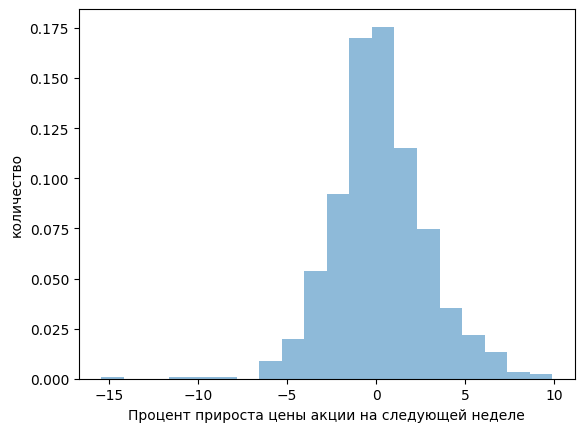

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y, 20, density=True, alpha = 0.5)
plt.xlabel('Процент прироста цены акции на следующей неделе')
plt.ylabel('количество')
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split

train_size = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(20, input_shape=(12, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(20))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=50)

model.evaluate(X_test.to_numpy(), y_test.to_numpy())

Epoch 1/50
18/18 [==============================] - 4s 7ms/step - loss: 7.4636
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4127
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4415
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4275
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4079
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4022
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 7.4107
Epoch 8/50
18/18 [==============================] - 0s 8ms/step - loss: 7.4001
Epoch 9/50
18/18 [==============================] - 0s 7ms/step - loss: 7.3822
Epoch 10/50
18/18 [==============================] - 0s 7ms/step - loss: 7.3817
Epoch 11/50
18/18 [==============================] - 0s 7ms/step - loss: 7.3632
Epoch 12/50
18/18 [==============================] - 0s 8ms/step - loss: 7.3516
Epoch 13/50
18/18 [==============================

6.17500114440918

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# YOUR SOLUTION HERE

mean_squared_error(y_test, y_pred)


1.9575959351541727

In [ ]:
mean_absolute_error(y_test, y_pred)

0.9214820026182428

In [ ]:
intel = new_df[new_df['stock'] == "INTC"]
intel

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
157,1,INTC,1/14/2011,20.71,21.33,20.57,21.08,274111012,1.786580,-29.118929,386719626.0,21.03,20.82,-0.998573,20,0.853890
158,1,INTC,1/21/2011,21.03,21.20,20.62,20.82,218479469,-0.998573,-20.295260,274111012.0,21.03,21.46,2.044700,13,0.864553
159,1,INTC,1/28/2011,21.03,21.94,20.93,21.46,325168191,2.044700,48.832379,218479469.0,21.55,21.68,0.603248,6,0.838770
160,1,INTC,2/4/2011,21.55,21.71,21.03,21.68,277969054,0.603248,-14.515300,325168191.0,21.74,21.76,0.091996,89,0.830258
161,1,INTC,2/11/2011,21.74,21.86,21.35,21.76,236842359,0.091996,-14.795422,277969054.0,21.63,22.14,2.357840,82,0.827206
162,1,INTC,2/18/2011,21.63,22.14,21.28,22.14,201181541,2.357840,-15.056774,236842359.0,21.95,21.86,-0.410023,75,0.813008
163,1,INTC,2/25/2011,21.95,22.19,21.01,21.86,256135777,-0.410023,27.315745,201181541.0,21.75,21.56,-0.873563,68,0.823422
164,1,INTC,3/4/2011,21.75,22.08,21.35,21.56,291751623,-0.873563,13.905065,256135777.0,21.69,20.87,-3.780540,61,0.834879
165,1,INTC,3/11/2011,21.69,21.74,20.61,20.87,289874871,-3.780540,-0.643270,291751623.0,20.66,19.93,-3.533400,54,0.862482
166,1,INTC,3/18/2011,20.66,20.88,19.71,19.93,347426088,-3.533400,19.853814,289874871.0,19.90,20.37,2.361810,47,0.903161


In [ ]:
intel_data = intel[["open", "high", "low", "close", "volume", "percent_change_price", "percent_change_volume_over_last_wk", "previous_weeks_volume", "next_weeks_open", "next_weeks_close", "days_to_next_dividend", "percent_return_next_dividend", "percent_change_next_weeks_price"]]
y = intel_data['percent_change_next_weeks_price']
X = intel_data.drop('percent_change_next_weeks_price', axis=1)
y_pred = lin_reg.predict(X)


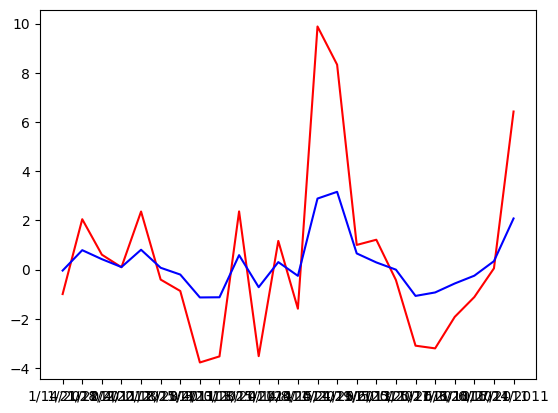

In [ ]:
plt.plot(intel["date"], y, c = "r")
plt.plot(intel["date"], y_pred, c = "blue")
